In [1]:
from pulp import *
import matplotlib.pylab as plt

## Run the Default Test Pulp

pulpTestAll()

## See how Pulp Works Using Base Documentation Example

This is an important first step toward working with the package if you have no prior experience and no known examples because it allows you to run a computation with a know outcome.
[Pulp Test Equation](https://pypi.org/project/PuLP/)

In [3]:
x = LpVariable("x", 0, 3)
y = LpVariable("y", 0, 1)
prob = LpProblem("myProblem", LpMinimize)
prob += x + y <= 2
prob += -4*x + y
status = prob.solve()
LpStatus[status]
print(value(x))
print(value(y))

2.0
0.0



## Realworld Problem One: Bakery Profits

You are hired by a bakery  charged with the task of optimizing profits for their small cakes division, which makes cream puffs and cupcakes
 * You have a total of 800 baker labor hours  
 * You have a total of 350 froster labor hours
 * You have unlimited access to needed materials (flour, butter, sugar, butter & flavorings)  
 * Cupcakes cost $ .65 in ingredients  
 
 * Cream Puffs cost  $ .85 in ingredients   
 
 * Cupcakes take .07 hours to bake (per cupcake)  
 
 * Cream Puffs take .06 hours to bake (per puff)  
 
 * Cupcakes take .07 hours to frost (per cupcake)  
 
 * Cream Puffs take .06 hours to frost (per puff)  
 
 * Cupcakes sell for $3.50     
 
 * Cream Puffs sell for $4.00



## Defining the Model Type
In this case all that we are doing is creating a pulp model object and assigning it a maximization argument, which will tell the solver that we want to maximize profits

In [4]:
model = pulp.LpProblem('Profit maximizing problem', pulp.LpMaximize)


### The Decsison Variables

In pulp we define the decision variables, and their possible range of values first, then apply the to an objective function

In [5]:
cupcake = pulp.LpVariable('cupcake', lowBound=0, cat ='Integer')
cream_puff = pulp.LpVariable('cream_puff', lowBound=0, cat ='Integer')



### The Objective Funtion

We simply start adding equations to the model which define the parameters of model, starting with the objective function and assigning it an outcome of 'profit' so we must use as a coefficient for each variable, the profit we calculated earlier.

In [6]:
model += 2.85*cupcake + 3.15*cream_puff, 'Profit'

### Contraint Functions

Now using the baking time and total baker housres we established prior, we create constraint functions for our model

In our case we have only two constraints, baker time & frosting time so we create a single constraint equation for each constraing which opposed the proportions of each variable against the total alloted time

In [7]:
#baking time
model +=.05*cupcake + .08*cream_puff <=800

#frosting time
model += .04*cupcake + .03*cream_puff <=350

### Solving The Model

We just pass the model to the method `.solve()` and it will optimize for the criteria we established in the first step, in this case maximizing profits

#### Verifying that PulP was Able to Find an Optimized Result

It is important to be sure that you are actually getting a fully optimized result, it is possible to compose a situation where Pulp would be unable to resolve as is.

In [8]:
model.solve()

pulp.LpStatus[model.status]

'Optimal'

### Retrieving Optimal Production Values & profit

to get values out of the model you apply the `.varValue` method to each of the decision variables. 
 * `cupcake.varValue`
 * `cream_puff.varValue`
 
To obtain our total profit for the month based on this equation we use `pulp.value(model.objective)`

You could expect any of the following outcomes
 * **Not Solved:** This tells you that you have not executed `solve()` yet
 * **Optimal:** Solver was able to establish an optimal solution
 * **Infeasible:** Indicative of constraints which make solving impossible
 * **Unbounded:** This is returned with you have a boundary without a fixed limit, such that you could find a limitless number of solutions within a range or toward infinity
 * **Undefined:** No optimal solution was found, there may or may not be one

In [9]:
cupcake.varValue

2352.0

In [10]:
cream_puff.varValue

8530.0

In [11]:
pulp.value(model.objective)

33572.7

### Making it Prettier

In [12]:
print "Cupcake Production Target: {} cupcakes per month".format(cupcake.varValue)
print "Cream Puff Production Target: {} cream puffs per month".format(cream_puff.varValue)

Cupcake Production Target: 2352.0 cupcakes per month
Cream Puff Production Target: 8530.0 cream puffs per month


In [13]:
print "Profit Per month based on {}  cupcakes and {} cream puff is ${} ".format(cupcake.varValue, cream_puff.varValue, pulp.value(model.objective))

Profit Per month based on 2352.0  cupcakes and 8530.0 cream puff is $33572.7 


## How Can We See if We Were Right?
We can plot the two varibles on X and Y axes after computing the bounding points with each of the contraint equations to validate what we have found above.

To do so, each of the inequalities is artificially converted to an equality, and zero is substituted for one of the two variables to calculate the x and y intercepts for the line.

Baking Time
.05*cupcake + .08*cream_puff =800
where 
    cupcake = 0 
    creampuff = 10,000

Where
    cream_puff = 0
    cupcake = 16,000
    
Frosting Time
model += .04*cupcake + .03*cream_puff <=350
where 
    cupcake = 0 
    creampuff = 11667 (rounded)

Where
    cream_puff = 0
    cupcake = 8750

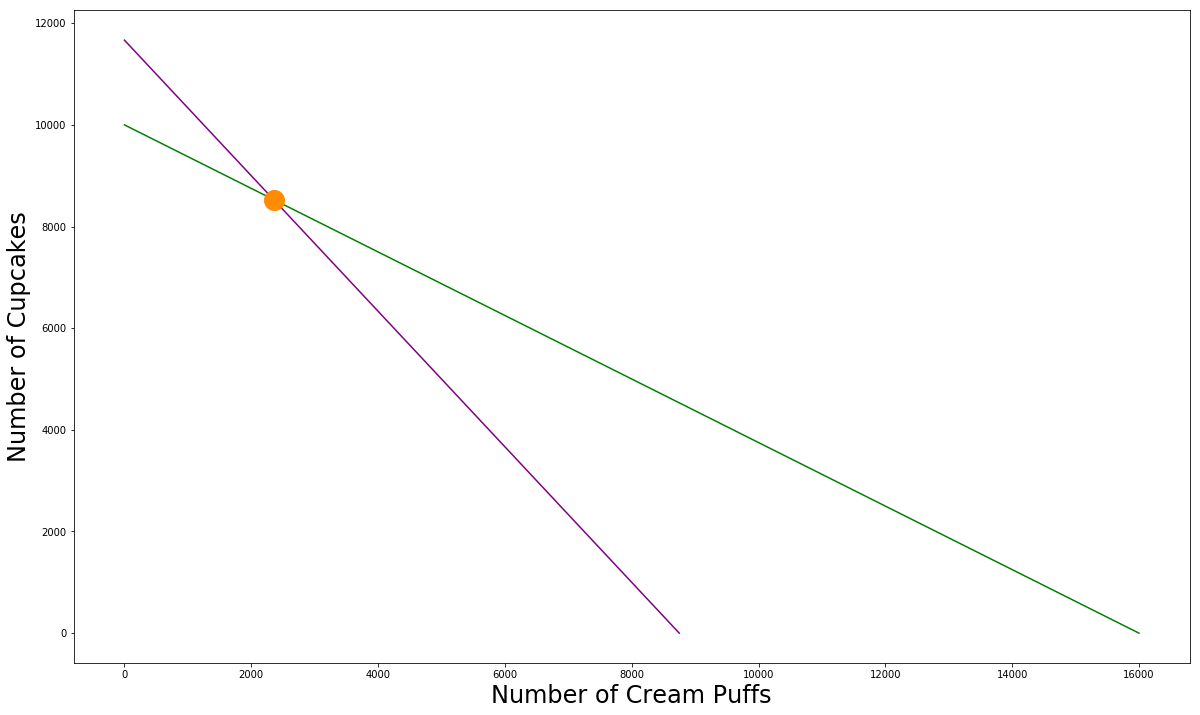

In [14]:
baking_cupcake = [0, 16000]
baking_cream_puff = [10000, 0]

frosting_cupcake = [0, 8750]
frosting_cream_puff =[11667, 0]

plt.figure(figsize=(20,12))
plt.plot(baking_cupcake, baking_cream_puff, color ='green',)
plt.plot(frosting_cupcake, frosting_cream_puff, color='purple')
plt.plot(2352, 8530, markersize=20, markeredgecolor='darkorange', marker = 'o', color='darkorange',label='Pulp\'s Solution') 
plt.xlabel('Number of Cream Puffs',fontsize =24)
plt.ylabel('Number of Cupcakes',fontsize =24)
#plt.savefig('cupcake_manual.png')
plt.show()

## Things We Could have Done But Did Not

We could have set upper bounds for our baked goods to accomodate demand or shelf space or some other limiting factor. To do this we would just add the `upBound = <some_value>`

We could also use other solvers `CPLEX` being one of them, however this would require installing and configuring compiled solvers for PulP to access.

# Optimizing Granola Blends


In this case we have a more complex problem to solve

We want to do minimize cost, while meeting the demands of our recent order which need to be filled for organic granola cereal to one of our clients who sells it under their store brand. 

Instead of creating a fixed recipe with a fixed profit we are going to work within a range of ingredient contents that we know, via testing, are considered a good product for their retail price. So, we are looking to minimize costs, while delivering acceptable granola products to meet our clients needs.

There are some things which we know for sure:

We need to deliver **725 12oz pouches of granola** and our vendors have requested the following:

 * **275 pouches of Premium Granola**
 * **450 pouches of Standard Granola**
 
Constraints Table
 
| Ingredient | Cost | Avalability |
|------------|------|-------------|
| Oats       | .75  | 380         |
| Cashews    | 6.00 | 75          |
| Honey      | 5.50 | 60          |
| Raisins    | 3.50 | 61          |

We have some criteria for minimums and maximum proportions of each based on customers responses to what seems appropriate for a good pouch of standard and premium granola.

### Mix Criteria

**premium**  
45% or more raisins & cashews  
12% honey  
**standard**  
25% or more raisins and cashews  
8% honey  

 


## Decision Variables

In this example, defining the decision variable and the objective function are both considerably more complicated because there are 4 components going into our product, and because we are making two grades of this product. 


Our decision variables are the ingredients:

* **oats**
* **cashews** 
* **honey**
* **raisins**

As well as types of product they create:

* **premium**
* **standard**

Note, because the two varieties of granola will each have a different blend of ingredients, if we were building a model manually, we would actually use subscripts to define the proportions for *premium* and *standard* mixes.

with the subscripts you will see them represented as follows in discussion so that it is easy to follow what we are looking at.

**ingredient_p** for premium ingredients (example: oats_p)  
**ingredient_s** for standard ingredients (example: standard_p)

However as you will see in the model-building step below we use some built in capabilities of lists, loops and Pulp to accomplish the actual assignment of variables

###  Building the Model in PulP

In [15]:
model = pulp.LpProblem("Cost Minimizing Ingredient Ratios", pulp.LpMinimize)

#### Building Decision Variable Lists for the Objective Function

In [16]:
granola_blends = ['premium', 'standard']
ingredients = ['oats', 'cashews', 'honey', 'raisins']

### Components on Hand

In this case we will pass a LIST COMPREHENSION is disguise into the function to pair the ingredients with the type of granola in adictionary.

Again we are setting the low boundary at 0 because all of the ingredients are mandatory and cannot be negative. This time, we are setting the type to continuous allowing for floating value quantities of each ingredient





In [17]:
component_weights = pulp.LpVariable.dicts("weight in pounds",
                                     ((blend, ingredient) for blend in granola_blends for ingredient in ingredients),
                                     lowBound=0,
                                     cat='Continuous')

### The Objective Function  


In this case, we aim to MINIMIZE COSTS based on meeting our mixture criteria and meeting delivery requirements.

$$cost = .75(oats_p + oats_s) + 6(cashews_p + cashews_s) + 5.50(honey_p + honey_s) + 3.5(raisins_p + raisins_s)$$



In [18]:

model += (
    pulp.lpSum([
        .75 * component_weights[(blend, 'oats')]
        + 6.00 * component_weights[(blend, 'cashews')]
        + 5.50 * component_weights[(blend, 'honey')]
        + 3.50 * component_weights[(blend, 'raisins')]
        for blend in granola_blends])
)

### Creating Constraints

We will break this down into steps so you can see each set of limitations your model will have to respect to reach an optimal state, starting with the **quantity of each blend**

In [19]:
model += pulp.lpSum([component_weights['standard', ingredient] for ingredient in ingredients]) ==450 *.75
model += pulp.lpSum([component_weights['premium', ingredient] for ingredient in ingredients]) ==275 *.75

### Creating Constraints for Raisin & Cashew Combinations



In [20]:
model += (component_weights['standard', 'cashews'] + component_weights['standard', 'cashews'] )>= (
    0.25 * pulp.lpSum([component_weights['standard', ingredient] for ingredient in ingredients]))


model += (component_weights['premium', 'cashews'] + component_weights['standard', 'cashews']) >= (
    0.45 * pulp.lpSum([component_weights['premium', ingredient] for ingredient in ingredients]))


### Creating Constraints for Honey Quantities

In [21]:
model += component_weights['standard', 'honey'] == (
    0.08 * pulp.lpSum([component_weights['standard', ingredient] for ingredient in ingredients]))

model += component_weights['premium', 'honey']== (
    0.12 * pulp.lpSum([component_weights['premium', ingredient] for ingredient in ingredients]))


### Creating Constraints for Available Quantities

In [22]:
model += pulp.lpSum([component_weights[blend, 'oats'] for blend in granola_blends]) <= 380

In [23]:
model += pulp.lpSum([component_weights[blend, 'cashews'] for blend in granola_blends]) <= 286
model += pulp.lpSum([component_weights[blend, 'honey'] for blend in granola_blends]) <= 102
model += pulp.lpSum([component_weights[blend, 'raisins'] for blend in granola_blends]) <= 198

### Solving the Model & Checking for Optimization

In [24]:
model.solve()
pulp.LpStatus[model.status]

'Optimal'

In [29]:
for ingredient in component_weights:
    value = component_weights[ingredient].varValue
    print "The weight of {0} in {1} granola blend is {2} kg\n".format(ingredient[1], ingredient[0], value)

The weight of raisins in premium granola blend is 19.1875 kg

The weight of oats in premium granola blend is 111.6875 kg

The weight of cashews in premium granola blend is 50.625 kg

The weight of raisins in standard granola blend is 0.0 kg

The weight of honey in premium granola blend is 24.75 kg

The weight of oats in standard granola blend is 268.3125 kg

The weight of cashews in standard granola blend is 42.1875 kg

The weight of honey in standard granola blend is 27.0 kg



In [31]:
total_cost = pulp.value(model.objective)

In [32]:
print "The total cost for 450 pouches of standard granola and 275 pouches of premium granola is ${}".format(round(total_cost, 2))

The total cost for 450 pouches of standard granola and 275 pouches of premium granola is $1193.66


## Citations

Heizer, Jay, and Barry Render. Operations management : sustainability and supply chain management. Boston: Pearson, 2014. Print.  

Cokelaer, Thomas. “Solving a Linear Programming Problem with Python (Pulp).” Thomas Cokelaers Blog, 28 Nov. 2012, thomas-cokelaer.info/blog/2012/11/solving-a-linear-programming-problem-with-python-pulp/.  

Keen, Ben. “Linear Programming with Python and PuLP - Part 1.” Ben Alex Keen, Apr. 2016, benalexkeen.com/linear-programming-with-python-and-pulp-part-1/.  


“PuLP Documentation.” Optimization with PuLP - PuLP 1.6.0 Documentation, pythonhosted.org/PuLP/index.html.

